#### Problem Statement


The challenge problem statement for workstation price prediction involves developing a model that accurately predicts the price of a workstation based on its specifications and features. This model should be able to learn from a dataset of workstation data and then provide accurate price estimations for new, unknown workstations. The goal is to create a system that can be used by both buyers and sellers to get a better understanding of the market value of different workstation configurations


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')
train.shape,test.shape

((21000, 15), (9000, 14))

In [ ]:
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


<Axes: xlabel='Per Person Price', ylabel='Density'>

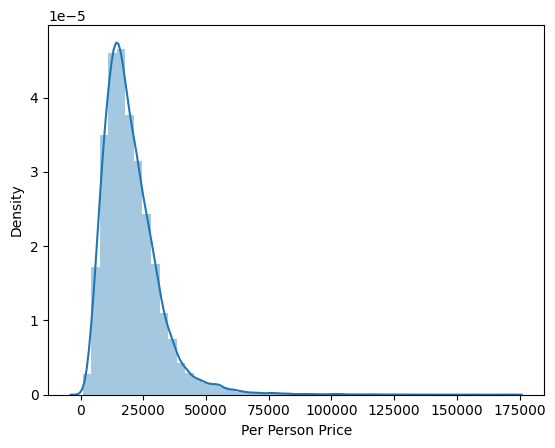

In [ ]:
# Analyse the target variable

sns.distplot(train['Per Person Price'])

In [ ]:
train['Per Person Price'].describe()

,Per Person Price
count,21000.000000
mean,20059.330381
std,11643.641766
min,791.000000
25%,12461.000000
50%,17765.500000
75%,25081.375000
max,171062.500000


In [ ]:
combined = pd.concat([train,test],axis=0,ignore_index=True)
combined.shape,train.shape,test.shape

((30000, 15), (21000, 15), (9000, 14))

In [ ]:
combined['Package Type'].value_counts()

,count
Package Type,
Deluxe,8499
Standard,8171
Premium,7960
Luxury,4688
Budget,682


In [ ]:
combined['Package Name'].value_counts()[:5].sort_values(ascending=False)

,count
Package Name,
Bali Special 4 Nights,53
Holiday in Manali & Chandigarh from Chandigarh,52
Getaway to the Hills of Kodaikanal from Madurai,46
Serene Uttarakhand with Kausani,44
Amazing Kerala,44


<Axes: xlabel='Package Type', ylabel='Per Person Price'>

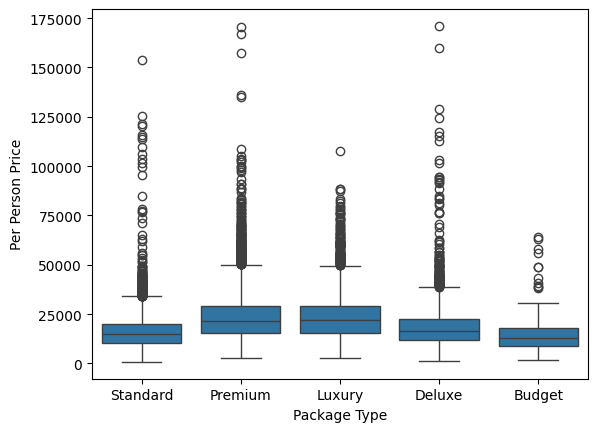

In [ ]:
# Package type vs Target Variable

sns.boxplot(data=combined,y='Per Person Price',x='Package Type')

In [ ]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

In [ ]:
combined['Destination'].unique()

array(['New Delhi|Shimla|Manali|Chandigarh', 'Srinagar|Pahalgam|Srinagar',
       'Udaipur|Chittorgarh',
       'Munnar|Kumarakom|Allepey|Kovalam and Poovar', 'Pattaya|Bangkok',
       'Cochin', 'Jaipur', 'Kasol|Manali',
       'Srinagar|Gulmarg|Pahalgam|Srinagar', 'Udaipur',
       'Kovalam and Poovar|Kanyakumari',
       'Cochin|Munnar|Allepey|Kovalam and Poovar', 'Guwahati',
       'Udaipur|Mount Abu', 'Chandigarh|Shimla|Manali|Chandigarh',
       'Nainital|Kausani|Corbett', 'Kodaikanal',
       'Srinagar|Gulmarg|Srinagar', 'Shimla|Manali|Dharamshala',
       'Ooty|Kodaikanal', 'Kodaikanal|Ooty|Mysore',
       'New Delhi|Agra|Jaipur', 'Dubai', 'Goa',
       'Gangtok|Pelling|Darjeeling',
       'Shimla|Manali|Dharamshala|Dalhousie|Amritsar',
       'Coorg|Ooty|Bandipur', 'Coorg', 'Munnar|Thekkady|Allepey',
       'Shimla', 'Darjeeling',
       'Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar',
       'Gangtok|Lachung|Gangtok', 'Srinagar|Gulmarg',
       'Mysore|Ooty|Bangalore', 'Ka

In [ ]:
locs = []
for i in combined.Destination:
  locs.append(len(i.split('|')))

In [ ]:
combined['Location Count'] = pd.Series(locs)
combined.loc[:,['Location Count','Per Person Price']].corr()

,Location Count,Per Person Price
Location Count,1.000000,0.317759
Per Person Price,0.317759,1.000000


In [ ]:
# Airline and sight seeing places covered
airline = [len(x.split('|')) for x in combined['Airline']]
combined['Airline_Count'] = pd.Series(airline)

places = [len(x.split('|')) for x in combined['Sightseeing Places Covered']]
combined['Places Covered'] = pd.Series(places)

In [ ]:
combined.Itinerary[7610]

'1N Jaipur . 1N Ajmer . 1N Jodhpur . 1N Mount Abu . 2N Udaipur'

In [ ]:
import re

pd.to_numeric(re.findall('\d',combined.Itinerary[7610])).sum()

np.int64(6)

In [ ]:
Nights =[pd.to_numeric(re.findall('\d',x)).sum() for x in combined['Itinerary']]

combined['Nights'] = pd.Series(Nights)
combined.iloc[:,-4:]

,Per Person Price,Location Count,Airline_Count,Nights
0,11509.0,4,1,6
1,22485.5,3,2,4
2,12421.5,2,1,3
3,35967.0,4,1,6
4,25584.0,2,2,7
...,...,...,...,...
29995,NaN,3,1,4
29996,NaN,4,1,4
29997,NaN,2,1,5
29998,NaN,4,2,7


In [ ]:
# Holiday count with target variable
combined[['Nights','Per Person Price']].corr()

,Nights,Per Person Price
Nights,1.000000,0.510186
Per Person Price,0.510186,1.000000


In [ ]:
combined['Hotel Details'].unique()

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Marari Beach - CGH Earth:4.6|Niraamaya Retreats Surya Samudra:4.5',
       'The Oberoi Cecil:Five|Fernhill Resort:Three',
       'Poppys Hotel:4.1|Hyatt Place Rameswaram:4.4|Hotel Temple Citi:4.2|Over The Hill-MMT Holidays Special:|Uday Backwater Resort-MMT Holidays Special:|Tea Village-MMT Holidays Special:'],
      dtype=object)

In [ ]:
#:[\d.\d]+
hotel = '''
'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Marari Beach - CGH Earth:5|Niraamaya Retreats Surya Samudra:4.5',
       'The Oberoi Cecil:Five|Fernhill Resort:Three',
       'Poppys Hotel:4.1|Hyatt Place Rameswaram:4.4|Hotel Temple Citi:4.2|Over The Hill-MMT Holidays Special:|Uday Backwater Resort-MMT Holidays Special:|Tea Village-MMT Holidays Special:'
       '''
hotel

"\n'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',\n       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,\n       'Marari Beach - CGH Earth:5|Niraamaya Retreats Surya Samudra:4.5',\n       'The Oberoi Cecil:Five|Fernhill Resort:Three',\n       'Poppys Hotel:4.1|Hyatt Place Rameswaram:4.4|Hotel Temple Citi:4.2|Over The Hill-MMT Holidays Special:|Uday Backwater Resort-MMT Holidays Special:|Tea Village-MMT Holidays Special:'\n       "

In [ ]:
def nas(text):
  ratings = []
  text = text.lower()
  if text == 'Not Available'or text is None:
    return np.nan
  else:
    text = text.replace(':one',':1')
    text = text.replace(':two',':2')
    text = text.replace(':three',':3')
    text = text.replace(':four',':4')
    text = text.replace(':five',':5')
    ratings = pd.to_numeric(re.findall('(?<=:)[\d.\d]+',text)).mean()
  return ratings

In [ ]:
combined['Ratings'] = combined['Hotel Details'].apply(nas)

In [ ]:
combined['Ratings'].describe()

,Ratings
count,24410.000000
mean,4.092098
std,0.406555
min,1.900000
25%,3.900000
50%,4.100000
75%,4.350000
max,5.000000


In [ ]:
combined['Ratings'].fillna(4.1,inplace=True)

In [ ]:
combined['City'] = combined['Start City'].apply(lambda x: 0 if x == 'New Delhi' else 1)

In [ ]:
# Travel Date

import datetime as dt
combined['Travel Date'] = pd.to_datetime(combined['Travel Date'])

combined['Day'] = combined['Travel Date'].dt.day
combined['Month'] = combined['Travel Date'].dt.month
combined['Year'] = combined['Travel Date'].dt.year

In [ ]:
combined.iloc[:,-11:]

,Cancellation Rules,Per Person Price,Location Count,Airline_Count,Nights,Ratings,City,Day,Month,Year,target
0,Not Available,11509.0,4,1,6,4.100000,1,30,7,2021,11509.0
1,Cancellation any time after making the 1st pay...,22485.5,3,2,4,4.433333,0,8,12,2021,22485.5
2,Cancellation any time after making the 1st pay...,12421.5,2,1,3,4.200000,0,26,4,2021,12421.5
3,Cancellation any time after making the 1st pay...,35967.0,4,1,6,4.500000,0,27,8,2021,35967.0
4,Cancellation any time after making the 1st pay...,25584.0,2,2,7,4.350000,0,12,12,2021,25584.0
...,...,...,...,...,...,...,...,...,...,...,...
29995,Cancellation any time after making the 1st pay...,NaN,3,1,4,4.000000,0,4,6,2021,NaN
29996,Cancellation any time after making the 1st pay...,NaN,4,1,4,3.500000,1,7,3,2021,NaN
29997,Cancellation any time after making the 1st pay...,NaN,2,1,5,4.250000,1,21,8,2021,NaN
29998,Cancellation any time after making the 1st pay...,NaN,4,2,7,4.125000,0,19,3,2021,NaN


In [ ]:
# Supply anova if datetime variables have any relation with target or not

# H0: Null hypothesis is date time month have no relation
# Ha: H0 is False

from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as sfa

combined['target'] = combined['Per Person Price']

model = sfa.ols('target~Day+Month+Year',data=combined).fit()
print(anova_lm(model))

               df        sum_sq       mean_sq         F    PR(>F)
Day           1.0  7.926039e+06  7.926039e+06  0.058457  0.808953
Month         1.0  5.591506e+07  5.591506e+07  0.412393  0.520764
Year          1.0  8.058435e+07  8.058435e+07  0.594337  0.440755
Residual  20996.0  2.846782e+12  1.355869e+08       NaN       NaN


In [ ]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Location Count',
       'Airline_Count', 'Nights', 'Ratings', 'City', 'Day', 'Month', 'Year',
       'target'],
      dtype='object')

In [ ]:
new = combined.drop(['Uniq Id','Package Name','Destination','Itinerary','Travel Date','Hotel Details','Start City','Airline',
'Sightseeing Places Covered','Cancellation Rules','target','Month','Day','Year'],axis=1)

In [ ]:
new.head()

,Package Type,Places Covered,Flight Stops,Meals,Per Person Price,Location Count,Airline_Count,Nights,Ratings,City
0,Standard,1,2,3,11509.0,4,1,6,4.100000,1
1,Premium,7,0,5,22485.5,3,2,4,4.433333,0
2,Luxury,8,0,4,12421.5,2,1,3,4.200000,0
3,Premium,9,0,5,35967.0,4,1,6,4.500000,0
4,Premium,2,0,5,25584.0,2,2,7,4.350000,0


In [ ]:
new['Package_count'] = new.groupby('Package Type')['Per Person Price'].transform('count')
new['Package_mean'] = new.groupby('Package Type')['Per Person Price'].transform('mean')
new['Package_median'] = new.groupby('Package Type')['Per Person Price'].transform('median')
new['Package_std'] = new.groupby('Package Type')['Per Person Price'].transform('std')
new['Package_min'] = new.groupby('Package Type')['Per Person Price'].transform('min')
new['Package_max'] = new.groupby('Package Type')['Per Person Price'].transform('max')

In [ ]:
# Split the data into train and test

newtrain = new.loc[0:train.shape[0]-1,:]
newtest = new.loc[train.shape[0]:,:]
newtest.drop('Per Person Price',axis=1,inplace=True)
dummydata = pd.get_dummies(newtrain,drop_first=True)

In [ ]:
nums = ['Flight Stops','Meals','Location Count','Airline_Count','Nights','Places Covered','Ratings','City','Package_count',
        'Package_min','Package_max','Package_mean','Package_std','Package_median']

from scipy import stats

for i in nums:
  teststats,pvalue = stats.ttest_ind(dummydata.loc[:,i],dummydata['Per Person Price'])
  if pvalue < 0.05:
    print(i,pvalue)

Flight Stops 0.0
Meals 0.0
Location Count 0.0
Airline_Count 0.0
Nights 0.0
Places Covered 0.0
Ratings 0.0
City 0.0
Package_count 0.0
Package_min 0.0
Package_max 0.0
Package_std 0.0
Package_median 3.5403682737859535e-107


In [ ]:
new.columns

Index(['Package Type', 'Places Covered', 'Flight Stops', 'Meals',
       'Per Person Price', 'Location Count', 'Airline_Count', 'Nights',
       'Ratings', 'City', 'Package_count', 'Package_mean', 'Package_median',
       'Package_std', 'Package_min', 'Package_max'],
      dtype='object')

In [ ]:
X = dummydata.drop(['Per Person Price','Package_mean'],axis=1)
y = dummydata['Per Person Price']

In [ ]:
import pyforest
pyforest.lazy_imports()
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error

rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

rf = rf.fit(xtrain,ytrain)
gb = gb.fit(xtrain,ytrain)

In [ ]:
ypredrf = rf.predict(xtest)
rms_rf = root_mean_squared_error(ytest,ypredrf)

ypred_gb = gb.predict(xtest)
rms_gb = root_mean_squared_error(ytest,ypred_gb)
print(f'RMS for RF model: {rms_rf}')
print(f'RMS for GB model: {rms_gb}')

RMS for RF model: 6629.703670452588
RMS for GB model: 7511.605641255365


In [ ]:
ytrain.isnull().sum().sum()

np.int64(0)